In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/TOFPET2/PETsysAnalysis/Python/'); 


from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
from PETsys_analysis_tools  import *;

%config InlineBackend.figure_format = 'retina'
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisCSVfiles/'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
def plot_rate( measurements_df, det_label='', color='salmon', do_draw_dark=False,  linestyle='None'):
    
    df_dark,df_withSource = measurements_df[-1:],measurements_df[:-1]
    
    d        = np.array(df_withSource['d[mm]'])
    d_err    = np.array(df_withSource['d_err[mm]'])
    
    dark_rate= np.array(df_dark['Rate[Hz]'])
    dark_rate_err = np.array(df_dark['Rate_err[Hz]'])

    rate     = np.array(df_withSource['Rate[Hz]']) - np.array(df_dark['Rate[Hz]'])
    rate_err = np.sqrt(np.square(np.array(df_withSource['Rate_err[Hz]'])) 
                       + np.square(np.array(df_dark['Rate_err[Hz]'])))
    if do_draw_dark:
        plt.fill_between( d, 
                         (dark_rate-dark_rate_err)*np.ones(len(d)), 
                         (dark_rate+dark_rate_err)*np.ones(len(d)), color=color, label = det_label + ' dark' )
    plt.errorbar(x=d,    xerr=d_err, 
                 y=rate, yerr=rate_err, 
                 label = det_label,  
                 color=color,
                 marker='o', 
                 linestyle=linestyle, 
                 capsize=2, 
                 markeredgecolor='k')

# Single scintillator efficiency to detect 511 keV $\gamma$-rays
Measurements done using a $^{22}$Na source on the scintillator, simulations using GEANT4

data taken on June-23, 2021


In [3]:
print('activity in time of measurement:',Na22_activity_per_day( d_t = date(2021,6,23) ))

activity in time of measurement: (8.845229917194121, 327237.51080999343)


In [4]:
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/ScintillatorSensitivity/'# BoxSi_proto2.2/ScintillatorSensitivity/'

In [5]:
SensL = pd.read_csv( main_data_path + 'SensL_vth12e_5_NSiPMmin_1.txt')
KETEK = pd.read_csv( main_data_path + 'KETEK_27x27_vth12e_5_NSiPMmin_1.txt')

## plot event-rate vs. source-detector distance

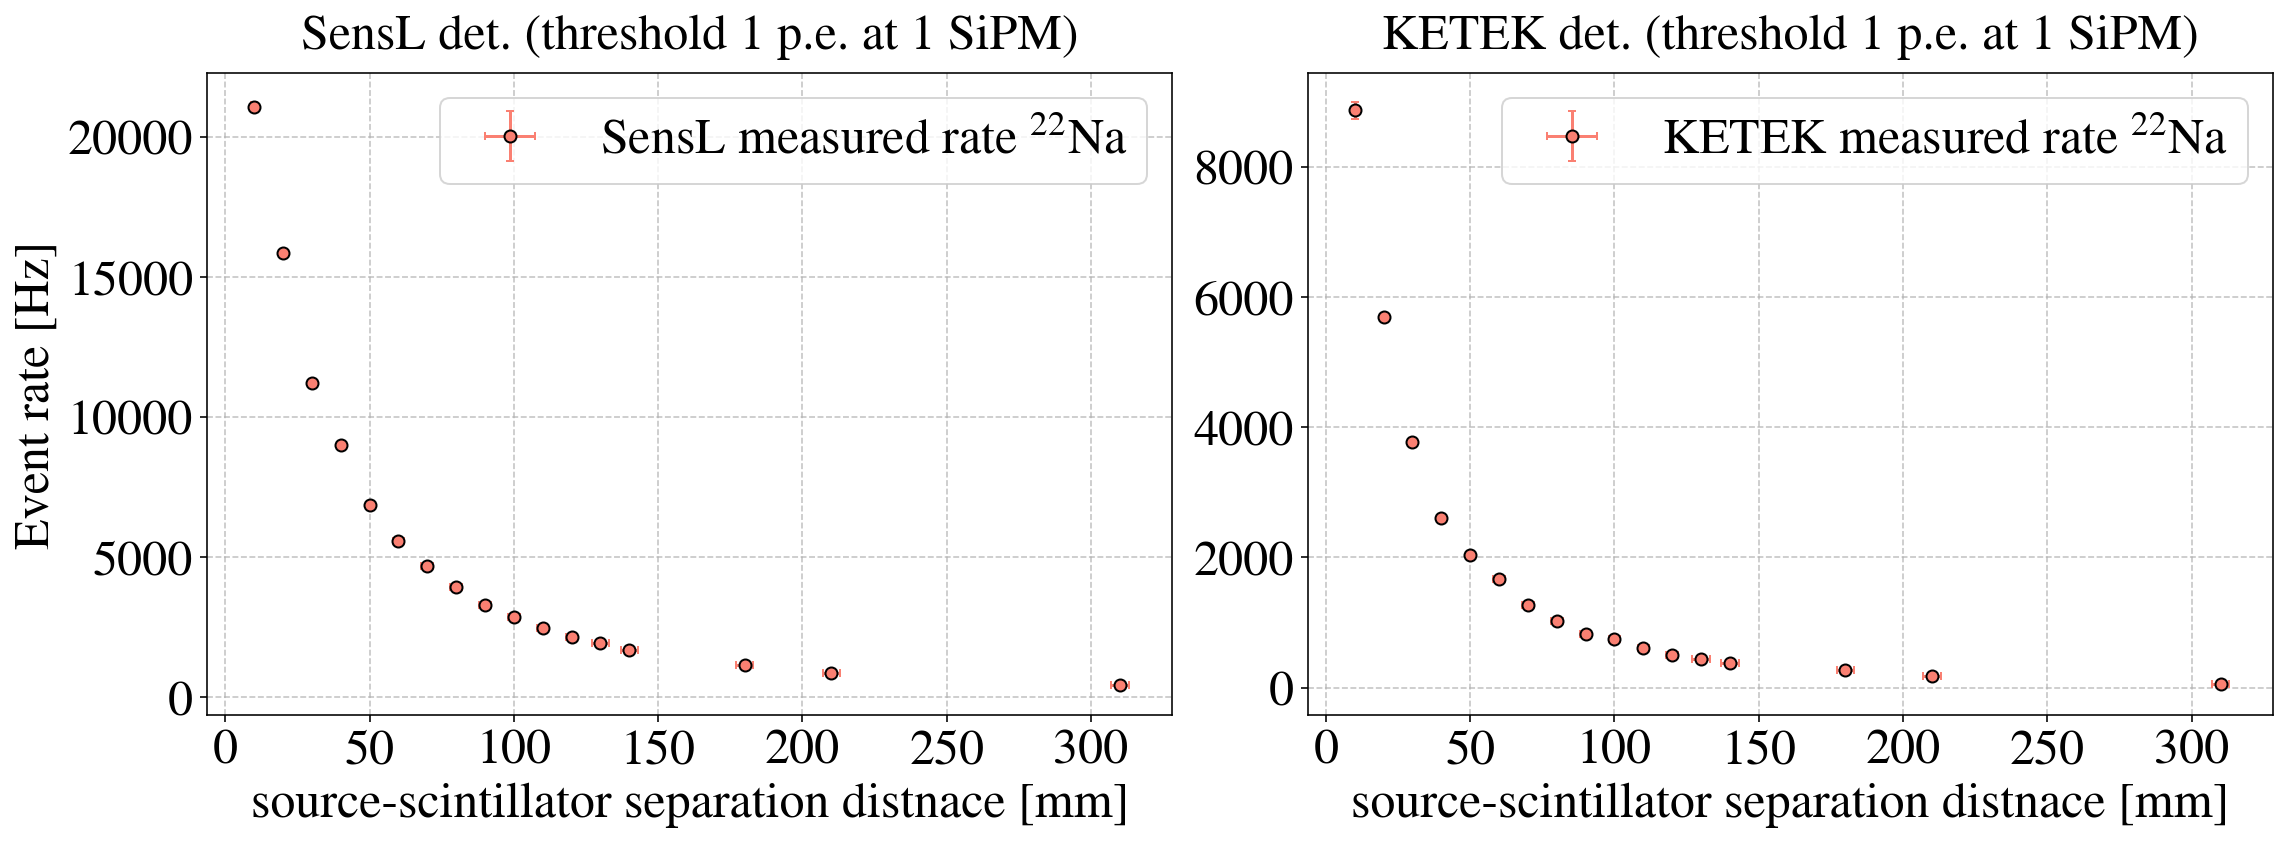

In [6]:
fig=plt.figure(figsize=(16,6))

ax=fig.add_subplot(1,2,1)
plot_rate( SensL, det_label='SensL' + ' measured rate $^{22}$Na', color='salmon');
set_axes(ax,'source-scintillator separation distnace [mm]',y_label='Event rate [Hz]',
         title='SensL det. (threshold 1 p.e. at 1 SiPM)',do_add_grid=True,do_add_legend=True)

ax=fig.add_subplot(1,2,2)
plot_rate( KETEK, det_label='KETEK' + ' measured rate $^{22}$Na', color='salmon');
set_axes(ax,'source-scintillator separation distnace [mm]',y_label='',
         title='KETEK det. (threshold 1 p.e. at 1 SiPM)',do_add_grid=True,do_add_legend=True)
plt.tight_layout()

## Add MC calculations

In [7]:
DetectorType='SensL'
EdepThreshold=330, # keV
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/Geant4Sims/' + DetectorType + '/'
dirfileslist = os.listdir(main_data_path)
for filename in dirfileslist:
    if 'EdepThresold_%dkeV'%EdepThreshold in filename:
        print (filename)

proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-110mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_40mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-150mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-200mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-40mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-10mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-100mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_10mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-140mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-50mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-130mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-90mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-180mm_primaries.csv
proto2.2_SensL_EdepThresold_330keV_sourceHolderX_-20mm_primaries.csv
proto2.2_SensL_EdepThresold_3

In [8]:
def get_simulated_event_rate(DetectorType='SensL',
                             EdepThreshold=330, # keV
                             dark_rate=0, dark_rate_err=0 ):
    
    main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/Geant4Sims/' + DetectorType + '/'
    
    primaries = pd.DataFrame();
    
    dirfileslist = os.listdir(main_data_path)
    for filename in dirfileslist:#{
        if 'EdepThresold_%dkeV'%EdepThreshold in filename:#{
            try:
                primaries = pd.concat([primaries,pd.read_csv(main_data_path + filename )])                        
            except:
                print( 'nothing in ',filename)
        #}
    #}
    generated = primaries
    detected  = primaries[primaries.NScintillatorsFired>0]

    dx_bins = np.linspace(0,300,16)
    hgen,dx_edges = np.histogram(generated['dx_Source_DetectorSurface/mm'],dx_bins)
    hgen_err = np.sqrt(hgen)
    hrec,dx_edges = np.histogram(detected['dx_Source_DetectorSurface/mm'],dx_bins)
    hrec_err = np.sqrt(hrec)
    heff = np.double(hrec)/np.double(hgen)
    heff_err = heff * np.sqrt( 1./np.double(hrec) + 1./np.double(hgen) )    
    sim_dx = (dx_edges[1:] + dx_edges[:-1])/2


    Na22_activity_uC, Na22_activity_Bqrl = Na22_activity_per_day( date(2021,6,23) );
    # expected rate in Hz, so dT = 1
    sim_rate = heff * Na22_activity_Bqrl + dark_rate
    sim_rate_err = np.sqrt( np.square(heff_err * Na22_activity_Bqrl)  
                           + np.square(dark_rate_err) 
                           # add 5% uncertainty on the activity 
                           # which is sort-of the manufacturer' uncertainty
                           + np.square(sim_rate * 0.05))
    
    return sim_dx, sim_rate, sim_rate_err

/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_8764/760812000.py:26: RuntimeWarning: invalid value encountered in true_divide
  heff = np.double(hrec)/np.double(hgen)
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_8764/760812000.py:27: RuntimeWarning: divide by zero encountered in true_divide
  heff_err = heff * np.sqrt( 1./np.double(hrec) + 1./np.double(hgen) )
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_8764/760812000.py:26: RuntimeWarning: invalid value encountered in true_divide
  heff = np.double(hrec)/np.double(hgen)
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_8764/760812000.py:27: RuntimeWarning: divide by zero encountered in true_divide
  heff_err = heff * np.sqrt( 1./np.double(hrec) + 1./np.double(hgen) )


saved /Users/erezcohen/Desktop/Projects/FNMC/BoxSi/papers/BoxSi_p2.2_NIM_paper/Figures/EdepThresholdDetermination.pdf


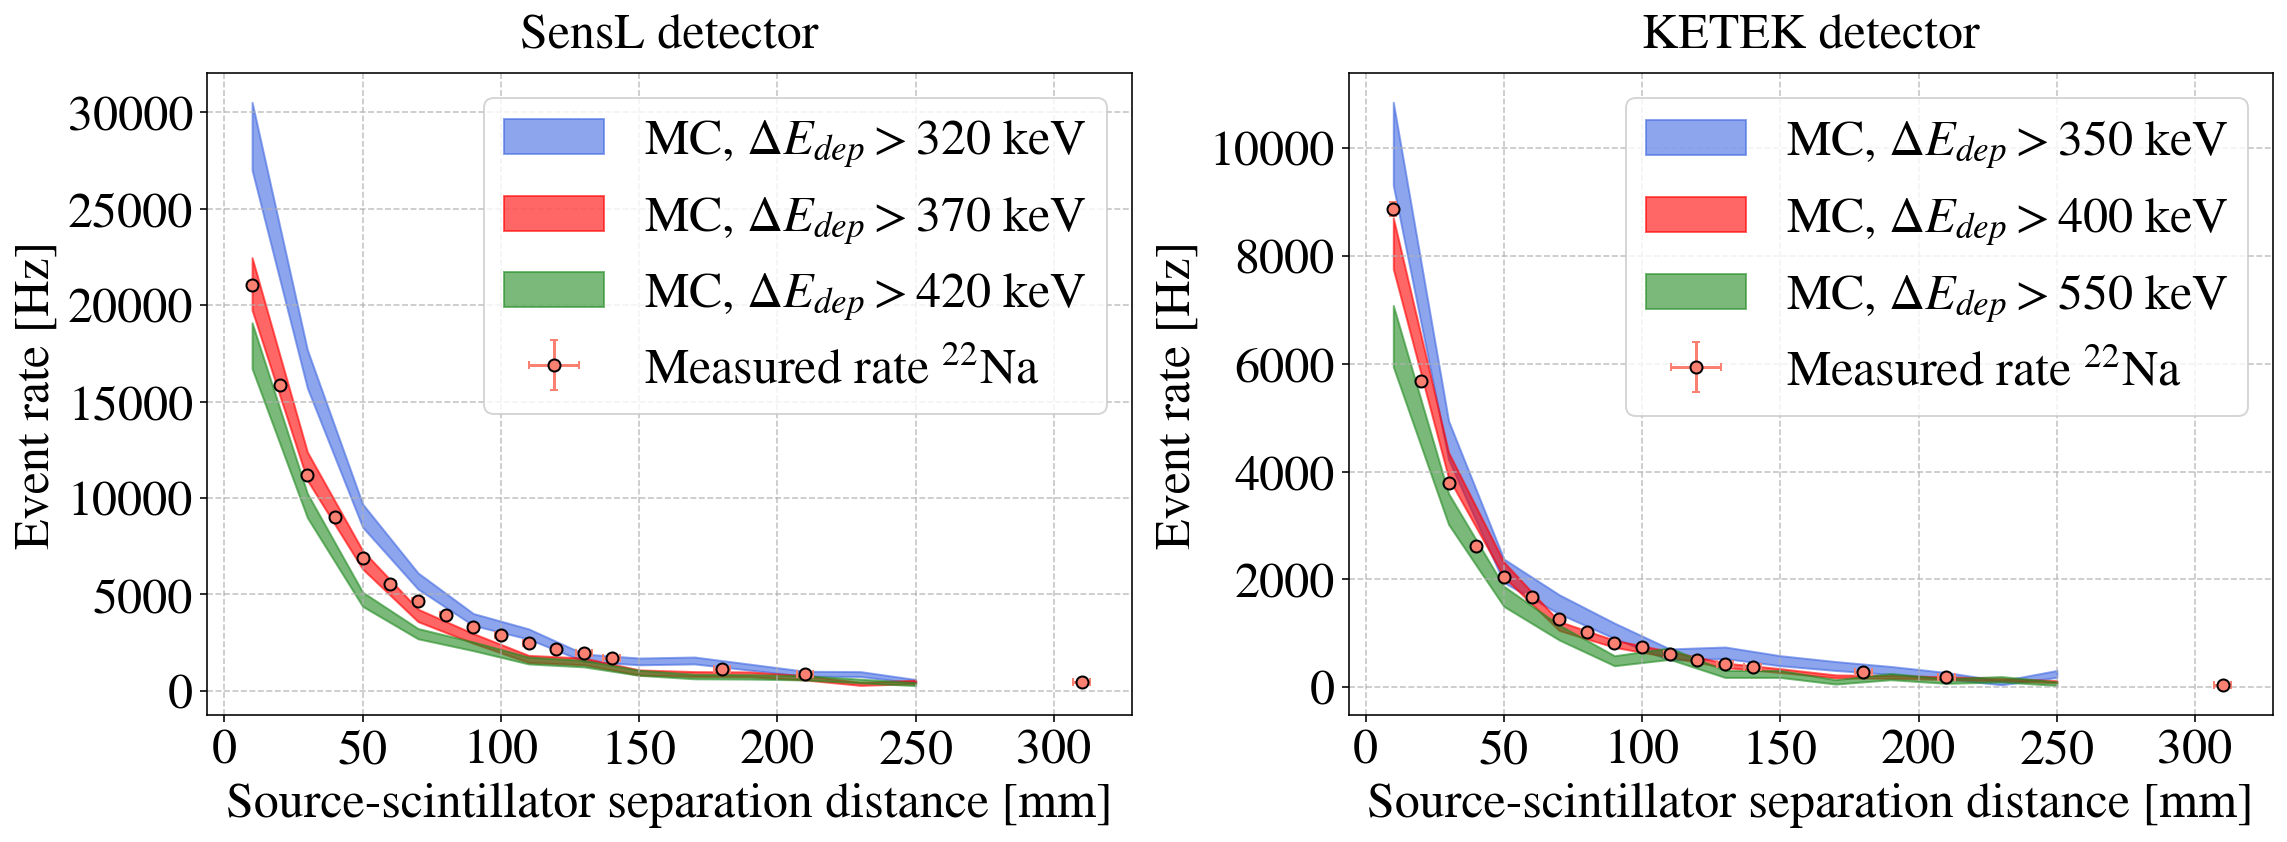

In [10]:
fig=plt.figure(figsize=(16,6))

ax=fig.add_subplot(1,2,1)
plot_rate( SensL, det_label='Measured rate $^{22}$Na', color='salmon');

for EdepThreshold,color in zip([320,370,420],['royalblue','red','forestgreen','magenta']): # keV
    sim_dx, sim_rate, sim_rate_err = get_simulated_event_rate(DetectorType='SensL',
                                                              EdepThreshold=EdepThreshold )
    plt.fill_between(sim_dx,sim_rate-sim_rate_err,sim_rate+sim_rate_err,color=color,alpha=0.6,
                 label='MC, $\Delta E_{dep}>%d$ keV'%EdepThreshold);    
set_axes(ax,'Source-scintillator separation distance [mm]',y_label='Event rate [Hz]',
         title='SensL detector',do_add_grid=True,do_add_legend=True)


ax=fig.add_subplot(1,2,2)
plot_rate( KETEK, det_label='Measured rate $^{22}$Na', color='salmon');

for EdepThreshold,color in zip([350,400,550],['royalblue','red','forestgreen','magenta']): # keV
    sim_dx, sim_rate, sim_rate_err = get_simulated_event_rate( DetectorType='KETEK',
                                                              EdepThreshold=EdepThreshold )
    plt.fill_between(sim_dx,sim_rate-sim_rate_err,sim_rate+sim_rate_err,color=color,alpha=0.6,
                 label='MC, $\Delta E_{dep}>%d$ keV'%EdepThreshold);
set_axes(ax,'Source-scintillator separation distance [mm]',y_label='Event rate [Hz]',
         title='KETEK detector',do_add_grid=True,do_add_legend=True)

plt.tight_layout()
save_figure('/Users/erezcohen/Desktop/Projects/FNMC/BoxSi/papers/BoxSi_p2.2_NIM_paper/Figures/EdepThresholdDetermination.pdf')